#### Tom Curran
#### Homework 4
#### Perspectives on Computational Analysis
#### November 7, 2017

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import scipy.stats
import seaborn as sns

Creating the simulator function which creates 10000 observations each at a 40 year period according to the salary equation in the homework prompt

In [227]:
def simulator(p):
    
    #set random seed for reproducability:
    np.random.seed(60)
    
    #create normal distribution of errors for salary:
    
    error_dist = np.random.normal(p["mean"], p["sd"],(p["num_years"], p["draws"]))
    
    #create a data frame with work year as rows and draw number as the column
    ln_income = np.zeros((p['num_years'], p['draws']))
    
    #creates first row of the matrix where income is equal to the log of the mean income plus the error term distribution
    ln_income[0,:] = np.log(p['income'])+ error_dist[0,:]
    
    #simulate the ln_income for the other 40 period
    for yr in range(1, p['num_years']):
        ln_income[yr,:] = (1-p['corr'])*(np.log(p['income']) +p['g']* yr) + p['corr'] * ln_income[yr - 1,:] + error_dist[yr, :]

    #converts from log normal to exponeniated (i.e. in terms of real dollars)
    ln_income = np.exp(ln_income)
   
    return(ln_income)
    

Param dictionary is a list of parameters set by the homework question #1

In [228]:
#parameters of homework assignment for question #1
param = {
        "income": 80000,     #average income
        "g": .03,            #percent annual growth
        "sd": .1,            #standard deviation
        "mean": 0.0,         #mean of error term
        "corr": 0.2,         #rho
        "num_years": 40,     #periods
        "draws":10000,        #number of random draws (i.e. number of different possible salary paths)
        "start_year": 2019
}

array([[  72955.4904516 ,   75444.31777571,   89875.605139  , ...,
          78596.00345702,   69992.36289852,   81722.75356498],
       [  84519.43074903,   89352.54207815,   83500.8581818 , ...,
          86675.1315508 ,   88037.32730076,   82321.36626342],
       [  90174.72982333,   82444.43758782,   95500.55792144, ...,
          81174.53720471,   78933.97840214,   80896.52477825],
       ..., 
       [ 251504.14918573,  234259.26951964,  246109.83727974, ...,
         205507.77447019,  271345.85309356,  255262.78233735],
       [ 257723.33965287,  241335.78360582,  249350.37749015, ...,
         241802.04061257,  257581.2368651 ,  243237.6261214 ],
       [ 249413.09010024,  286067.40048864,  251805.5339265 , ...,
         216325.21654906,  290888.03704053,  225820.74005332]])

### Question 1:

(3 points) Let the standard deviation of your income process be σ = 0.1, let the persistence be ρ = 0.2, let the long-run growth rate of income be g = 0.03, and let the average initial income be inc0 = $80, 000. Assume you will work for 40 years after you graduate (2019 to 2058). Simulate 10,000 different realizations of your lifetime income. Do this by first drawing 10,000 sets of 40 normally distributed errors with mean 0 and standard deviation σ = 0.1. Then plug those into the income process defined above to simulate your lifetime income. Plot one of the lifetime income paths. Make sure your axes are correctly labeled and your plot has a title.

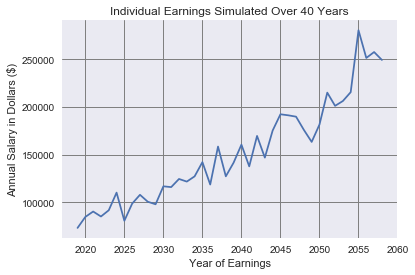

In [229]:
salaries = simulator(param)

years = np.arange(param['start_year'], param['start_year']+ param['num_years'])
earnings = salaries[:,0]


%matplotlib inline

#graph earnings over lifetime for person at column 0
fig, ax = plt.subplots()
plt.plot(years, earnings)
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which = "major", color = '.5', linestyle = "-")
plt.title("Individual Earnings Simulated Over 40 Years")
plt.xlabel("Year of Earnings")
plt.ylabel("Annual Salary in Dollars ($)")

### Question 2:

(2 points) Plot a histogram with 50 bins of year t = 2019 initial income for each of the 10,000 simulations.
What percent of your class will earn more than 100,000 in the first year out of the program? What percent of the class will earn less than 70,000? Is the distribution normally distributed (i.e. symmetric and bell-curved)?

Earning under $70,000 annually:  9.43 %
Earning over $100,000 annually:  1.37 %


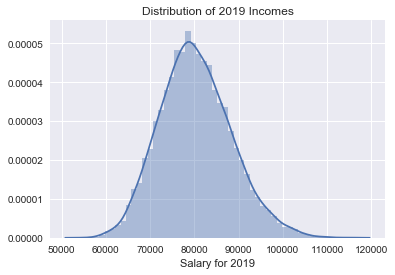

In [230]:
#initial salaries start at year 0 for 10,000 observations
initial_salaries = salaries[0,:]

initial_salaries_distribution = sns.distplot(initial_salaries)
initial_salaries_distribution.set_title("Distribution of 2019 Incomes")
initial_salaries_distribution.set_xlabel("Salary for 2019")
#using stats function percentile of score as documented here: https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.percentileofscore.html

#percent of people earning below 70000
under_70k = scipy.stats.percentileofscore(initial_salaries, 70000)
print("Earning under $70,000 annually: ", under_70k,"%")
#percent of people earning above 100000. Need to subtract from 100 b/c function is actually a multiple % and shows
#number below the specified number
over_100k = 100- scipy.stats.percentileofscore(initial_salaries, 100000)
print("Earning over $100,000 annually: ", over_100k,"%")

### Question 3:
(3 points) Suppose you graduate from the MACSS program with $95,000 of zero-interest debt. You will use 10 percent of your annual salary after you graduate to pay off this loan. Plot the histogram of how
many years it takes to pay off the loan in each of your 10,000 simulations. This histogram will only have as many bins as you have unique years in which people pay off their debt. 

In what percent of the simulations are you able to pay off the loan in 10 years (on or before t = 2028)?


In [231]:
#creating parameter variables
years = param['num_years']
draws = param['draws']
debt = 95000
paymentRate = .1

#1 row matrix that contains the year that the debt was paid off based on
# the lifetime salaries in salaries dataframe generated from simulator
paid_off = np.zeros((draws))

#iteratively going through and subtracting 10% of each year's earnings from
#debt amount until debt is zero or below. Once the debt hits zero or below
#the number of periods (years) is added to graduating year (2019)
for col in range(0, draws):
    payoff_debt = debt
    for row in range(0, years):
        payment = paymentRate * salaries[row][col]
        payoff_debt -= payment
        if payoff_debt <= 0:
            year = row + 2019
            paid_off[col] = year           
            break

Plot the histogram of how many years it takes to pay off the loan in each of your 10,000 simulations.

([<matplotlib.axis.XTick at 0x12222d6a0>,
 <a list of 3 Text xticklabel objects>)

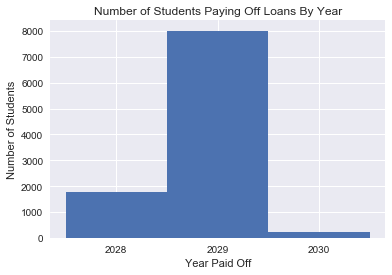

In [232]:

#create bins based on only values in paid_off matrix
bins = np.arange(min(paid_off)-.5, max(paid_off)+1)
plt.hist(paid_off,
        bins = bins)
plt.title("Number of Students Paying Off Loans By Year")
plt.xlabel("Year Paid Off")
plt.ylabel("Number of Students")
plt.xticks(np.arange(min(paid_off),max(paid_off)+1, 1))


In what percent of the simulations are you able to pay off the loan in 10 years (on or before t = 2028)?

In [234]:
ten_or_under = (len(paid_off[paid_off <= 2028])/len(paid_off))*100
print(str(ten_or_under)+"% of students are able to pay off their student loans on or before 2029, or ten or fewer years after graduating")

17.78% of students are able to pay off their student loans on or before 2029, or ten or fewer years after graduating


### Question 4:
Now suppose that the UChicago MACSS program becomes very well known in the next year, and the skills you are learning are demanded more by employers. This increases the average starting salary to inc0 = $85, 000, but the standard deviation in incomes increases also to σ = 0.15. 

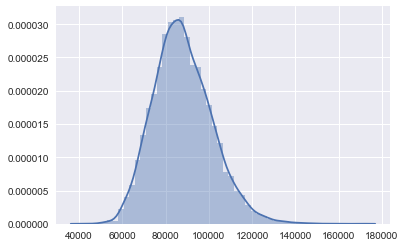

In [235]:
#create new dictionary based on question parameters
param_q4 = {
        "income": 85000,     #average income
        "g": .03,            #percent annual growth
        "sd": .15,           #standard deviation
        "mean": 0.0,         #mean of error term
        "corr": 0.2,         #rho
        "num_years": 40,     #periods
        "draws":10000,       #number of random draws (i.e. number of different possible salary paths)
        "start_year": 2019
}


#pass in new dictionary to simulator()
salaries_q4 = simulator(param_q4)

#distribution of salaries base on new paramters
initial_salaries_q4 = salaries_q4[1].tolist()
initial_salaries_distribution = sns.distplot(initial_salaries_q4)


Plot the new histogram of how many years it takes to pay off your loan of $95,000 in your new 10,000 simulations with the new standard deviation and the new average initial salary.

In [236]:
#initial salaries start at year 0 for 10,000 observations
#creating parameter variables
years = param_q4['num_years']
draws = param_q4['draws']
debt = 95000
paymentRate = .1

#1 row matrix that contains the year that the debt was paid off based on
# the lifetime salaries in salaries dataframe generated from simulator
paid_off_q4 = np.zeros((draws))

#iteratively going through and subtracting 10% of each year's earnings from
#debt amount until debt is zero or below. Once the debt hits zero or below
#the number of periods (years) is added to graduating year (2019)
for col in range(0, draws):
    payoff_debt = debt
    for row in range(0, years):
        payment = paymentRate * salaries[row][col]
        payoff_debt -= payment
        if payoff_debt <= 0:
            year = row + 2019
            paid_off_q4[col] = year           
            break


([<matplotlib.axis.XTick at 0x120d9dd30>,
 <a list of 3 Text xticklabel objects>)

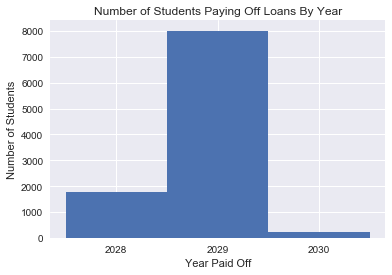

In [237]:
#create bins based on only values in paid_off matrix
bins = np.arange(min(paid_off_q4)-.5, max(paid_off_q4)+1)
plt.hist(paid_off_q4,
        bins = bins)
plt.title("Number of Students Paying Off Loans By Year")
plt.xlabel("Year Paid Off")
plt.ylabel("Number of Students")
plt.xticks(np.arange(min(paid_off_q4),max(paid_off_q4)+1, 1))


In what percent of the simulations are you able to pay off the loan in 10 years (on or before t = 2028)?

In [238]:
ten_or_under_q4 = (len(paid_off_q4[paid_off_q4 <= 2029])/len(paid_off_q4))*100
print(str(ten_or_under_q4)+"% of students are able to pay off their student loans on or before 2029, or ten or fewer years after graduating")

97.92% of students are able to pay off their student loans on or before 2029, or ten or fewer years after graduating


In [239]:
pd.DataFrame(salaries)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,72955.490452,75444.317776,89875.605139,70658.205030,65595.271494,91167.413517,86125.655522,83091.113842,80007.913998,71630.657006,...,61827.114819,70949.712241,75108.711593,81946.868520,84249.338021,78755.518464,92692.351298,78596.003457,69992.362899,81722.753565
1,84519.430749,89352.542078,83500.858182,79449.306886,74680.704974,75107.356762,67793.500377,83480.160519,94152.986420,83143.022767,...,75471.420017,72146.911827,79034.129355,79512.516454,83945.942212,85996.529711,76493.754518,86675.131551,88037.327301,82321.366263
2,90174.729823,82444.437588,95500.557921,89853.772557,87443.894416,86041.955976,78710.244053,73171.752769,75973.825313,70269.153989,...,83239.669427,80517.907874,77085.280394,83688.608874,77502.767146,77670.280777,84964.739710,81174.537205,78933.978402,80896.524778
3,84956.676610,84850.925997,100360.931326,81071.757630,107007.490725,100670.647763,107902.778893,78685.928101,81830.999697,83375.929425,...,87292.451207,96714.209087,88096.734588,106686.739256,88695.579932,99436.585841,86377.015570,83435.813410,86713.186588,85116.868997
4,91496.361174,91111.385179,101930.673133,82557.922478,92277.255517,72025.528412,97396.668694,95957.861759,80574.352909,77328.551345,...,72847.071899,89480.369007,91918.301565,94012.988479,94124.613234,84455.783712,91923.981592,87377.254919,77333.233986,89895.554398
5,110042.655640,85523.104548,95435.148414,78016.780084,89079.759253,98724.652389,92227.487248,77911.913997,102944.202146,81969.281881,...,104461.607201,93771.005465,116988.564951,89646.483452,97379.701463,98142.991669,104289.642870,86350.824420,92488.440131,83903.658243
6,80487.831738,85625.412369,96127.608508,91075.210621,96430.673173,94983.806798,98799.351048,84540.512742,105470.147354,78207.297577,...,104793.393666,88020.751039,88176.269370,75271.492163,100584.544864,109149.903902,104309.124775,88750.191363,92364.295110,93988.784946
7,98504.672727,99856.786533,97831.560395,105977.595198,107373.801834,90897.277524,106885.680838,102618.217729,89676.470855,102827.717615,...,90533.764581,95422.855782,99079.917360,83556.500104,105083.320260,103679.199426,104597.764860,86804.637186,92996.520911,113697.754720
8,107746.855582,112987.376376,111311.289937,120047.429503,112287.829454,93263.553128,104511.668219,90525.845148,122798.522194,100977.352075,...,90585.856660,110515.845178,88264.542106,90030.703821,107968.785751,127106.815372,92021.998134,101209.414859,100339.336187,104154.686974
9,100456.770273,106791.764280,98893.831917,113458.913677,101380.658059,108026.869456,89392.973968,130940.305118,99613.141460,100506.158063,...,114302.800127,114858.323024,93570.083992,104178.413230,112327.930809,103121.735334,104107.725304,99688.710203,107966.447614,113001.046135
